In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df = df[:5000]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Resort Hotel,1,212,2016,April,16,11,2,5,2,...,Non Refund,273.0,NaN,0,Transient,76.05,0,0,Canceled,2015-10-16
4996,Resort Hotel,1,212,2016,April,16,11,2,5,2,...,Non Refund,273.0,NaN,0,Transient,76.05,0,0,Canceled,2015-10-16
4997,Resort Hotel,1,212,2016,April,16,11,2,5,2,...,Non Refund,273.0,NaN,0,Transient,67.05,0,0,Canceled,2015-10-16
4998,Resort Hotel,1,212,2016,April,16,11,2,5,2,...,Non Refund,273.0,NaN,0,Transient,67.05,0,0,Canceled,2015-10-16


In [3]:
df = df[['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']]

In [4]:
df

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4996,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4997,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4998,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0


# EDA

# - Tipe hotel keseluruhan adalah resort hotel

<AxesSubplot:xlabel='hotel', ylabel='count'>

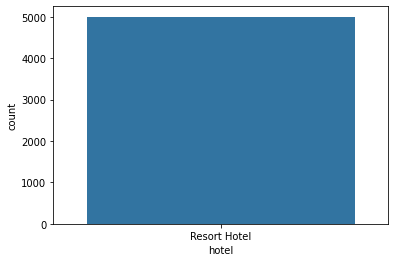

In [5]:
sns.countplot(df['hotel'])

# - Customer yang cancel booking sebesar 45.96 % dari total customer

0    54.04
1    45.96
Name: is_canceled, dtype: float64


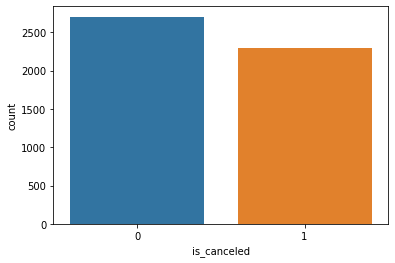

In [6]:
sns.countplot(df['is_canceled'])
print(df['is_canceled'].value_counts(normalize= True) * 100)

# Persentase type Customer yang tidak cancel booking dan cancel booking berdasarkan customer_type:
 
- Transient        
yes              37.60 %
no             36.38 %

- Transient-Party  
no              13.96 %
yes               7.18 %

- Contract         
no               3.54 %
yes               0.84 %

- Group            
yes               0.34 %
no              0.16 %

customer_type    is_canceled
Transient        1              37.60
                 0              36.38
Transient-Party  0              13.96
                 1               7.18
Contract         0               3.54
                 1               0.84
Group            1               0.34
                 0               0.16
dtype: float64

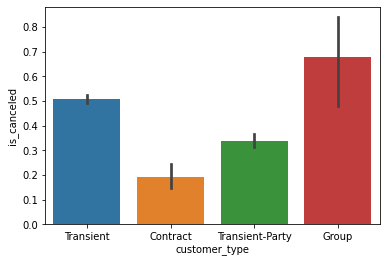

In [7]:
sns.barplot(df['customer_type'], df['is_canceled'])
df[['customer_type', 'is_canceled']].value_counts(normalize= True) * 100

# - Type customer yang booking berdasarkan "Group" memiliki persentase cancel booking terbesar, dibanding type customer lain yang cenderung lebih merata

<AxesSubplot:xlabel='customer_type', ylabel='adults'>

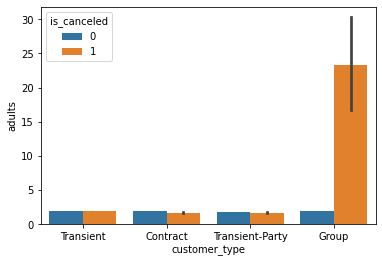

In [8]:
sns.barplot(df['customer_type'], df['adults'], hue= df['is_canceled'])

# - Type customer Contract cenderung lebih banyak membawa anak2, angka cancel booking paling tinggi dibanding yang lainnnya

<AxesSubplot:xlabel='customer_type', ylabel='children'>

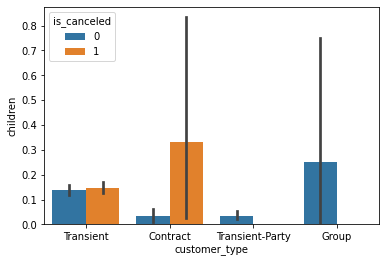

In [9]:
sns.barplot(df['customer_type'], df['children'], hue= df['is_canceled'])

# - Type customer Transient paling banyak membawa bayi dan merupakan type customer yang lebih sering melakukan cancel booking dibanding type customer lainnya

<AxesSubplot:xlabel='customer_type', ylabel='babies'>

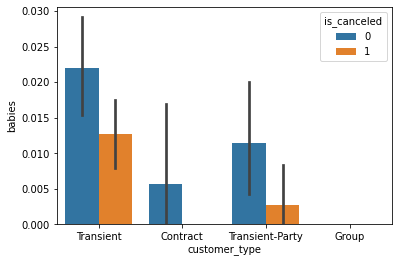

In [10]:
sns.barplot(df['customer_type'], df['babies'], hue= df['is_canceled'])

# - Market segment yang melakukan cancel booking paling banyak di market segment "Groups"

<AxesSubplot:xlabel='market_segment', ylabel='is_canceled'>

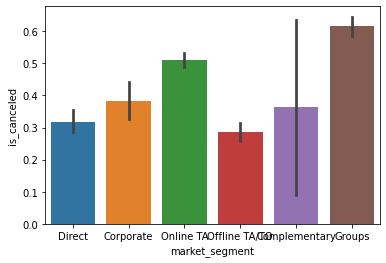

In [11]:
sns.barplot(df['market_segment'], df['is_canceled'])

# - Resort Hotel membutuhkan lebih banyak slot parking bagi customer, namun tidak mengakibatkan customer untuk cancel booking

<AxesSubplot:xlabel='hotel', ylabel='required_car_parking_spaces'>

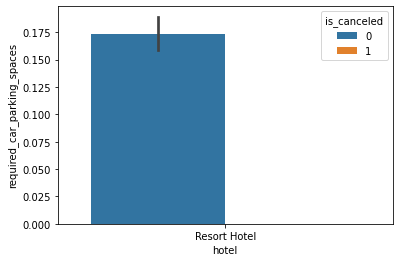

In [12]:
sns.barplot(df['hotel'], df['required_car_parking_spaces'], hue= df['is_canceled'])

# - Customer yang melakukan special request (Twin Bed / Lantai Tinggi) hampir sering terjadi, dan persentase yang cancel booking tinggi

<AxesSubplot:xlabel='hotel', ylabel='total_of_special_requests'>

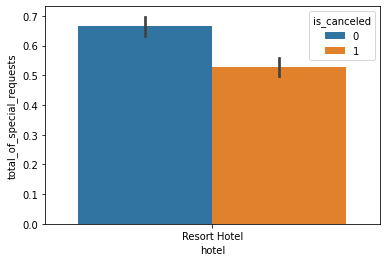

In [13]:
sns.barplot(df['hotel'], df['total_of_special_requests'], hue= df['is_canceled'])

# - Tipe paket makanan hotel tipe BB paling banyak diminati:
- BB           68.36%
- HB           20.74%
- SC            6.38%
- Undefined     4.24%
- FB            0.28%

BB           68.36
HB           20.74
FB            6.38
Undefined     4.24
SC            0.28
Name: meal, dtype: float64


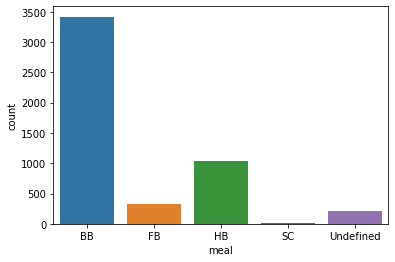

In [14]:
sns.countplot(df['meal'])
print(df['meal'].value_counts(normalize= True) * 100)

# - Booking changes hampir sering terjadi di Resort Hotel, namun yang akhirnya cancel booking tetap lebih sedikit

<AxesSubplot:xlabel='hotel', ylabel='booking_changes'>

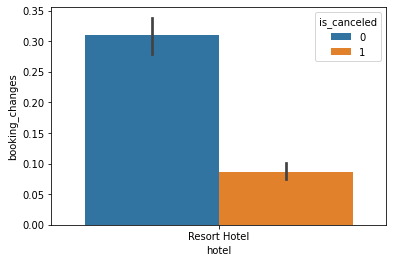

In [15]:
sns.barplot(df['hotel'], df['booking_changes'], hue= df['is_canceled'])

# - Terdapat jumlah cancel booking tinggi pada non refundable deposit type, terutama dari customer Transient dan Contract, sedangkan pada Non Refundable hanya customer Transient-Party yang cancel booking 

<AxesSubplot:xlabel='deposit_type', ylabel='is_canceled'>

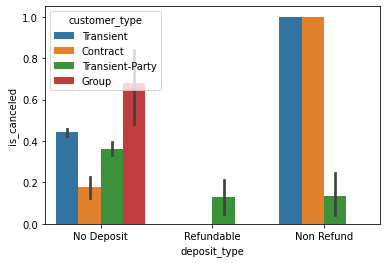

In [16]:
sns.barplot(df['deposit_type'], df['is_canceled'], hue= df['customer_type'])

# Penjelasan tentang insight yang ditemukan dari hasil Exploratory Data Analysis ke manajemen hotel :

- Lebih memperhatikan type customer yang melakukan booking berdasarkan "Group" karena persentase cancel booking tinggi.

- Market segment yang melakukan cancel booking paling banyak terjadi di market segment "Groups", sebaiknya lebih menganalisa market Groups yang melakukan booking agar bisa meminimalisir pengunjung yang melakukan cancel booking.

- Resort Hotel membutuhkan lebih banyak slot parking bagi customer, namun tidak terdata mengakibatkan customer untuk cancel booking, dengan meningkatkan slot parkir untuk resort hotel mungkin bisa lebih meningkatkan minat customer dalam memilih resort tersebut sebagai destinasi pilihan.

- Tipe paket makanan hotel tipe BB paling banyak diminati:
- - BB           68.36%
- - HB           20.74%
- - SC            6.38%
- - Undefined     4.24%
- - FB            0.28%

Pihak manajemen sebaiknya bisa lebih meningkatkan / memperbanyak variasi tipe paket makanan yang lain agar customer yang sering berkunjung tidak bosan untuk menikmati hidangan di hotel.

- Booking changes hampir sering terjadi di Resort Hotel, pihak manajemen dapat lebih memperhatikan konsekuensi yang harus ditanggung customer apabila melakukan pergantian booking / cancel booking agar dapat lebih meminimalisir frekuensi yang melakukan cancel booking / pergantian booking.

- Terdapat jumlah cancel booking tinggi pada non refundable deposit type dan no deposit type, kebijakan dalam non deposit type mungkin dapat diperbaharui agar bisa lebih meminimalisir cancel booking

<AxesSubplot:xlabel='required_car_parking_spaces', ylabel='Density'>

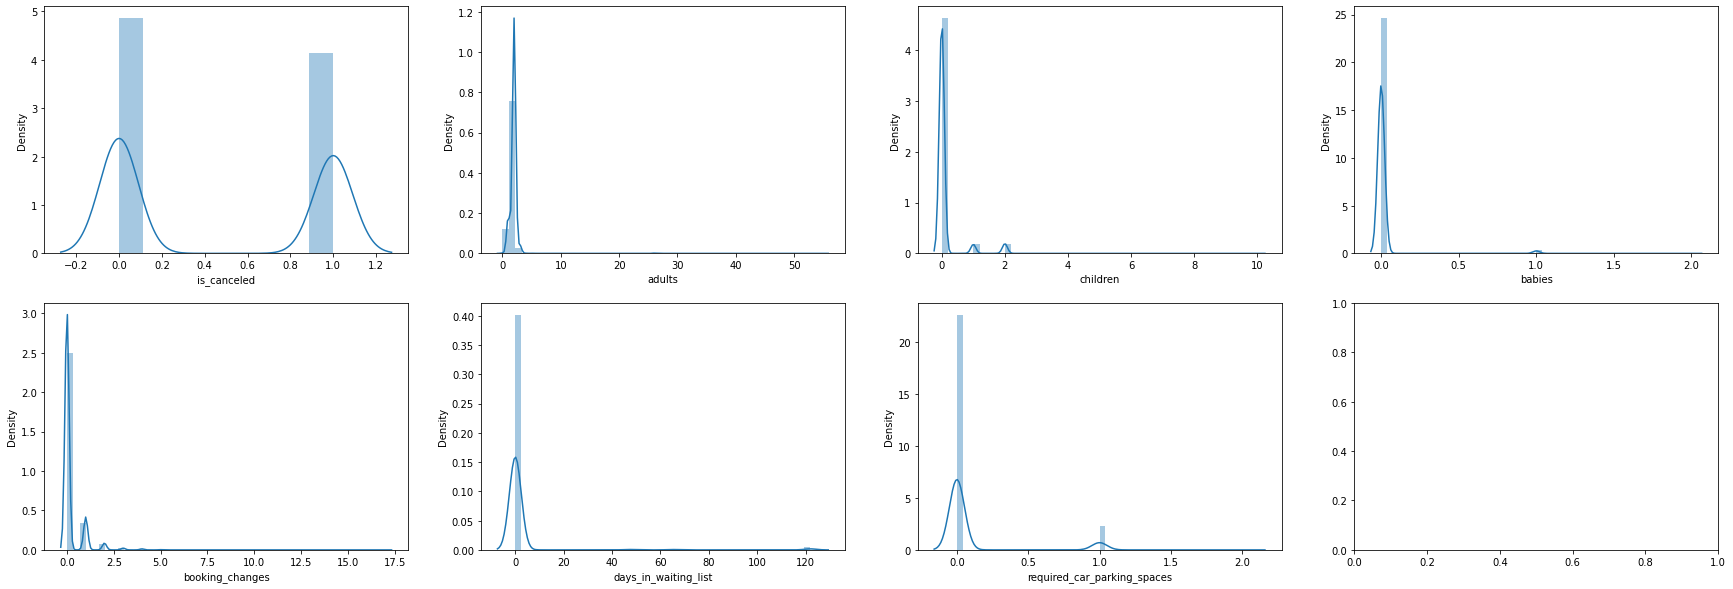

In [17]:
f, axes = plt.subplots(2, 4, figsize= (30, 10))

sns.distplot(df['is_canceled'], ax= axes[0][0])
sns.distplot(df['adults'], ax= axes[0][1])
sns.distplot(df['children'], ax= axes[0][2])
sns.distplot(df['babies'], ax= axes[0][3])

sns.distplot(df['booking_changes'], ax= axes[1][0])
sns.distplot(df['days_in_waiting_list'], ax= axes[1][1])
sns.distplot(df['required_car_parking_spaces'], ax= axes[1][2])


<AxesSubplot:>

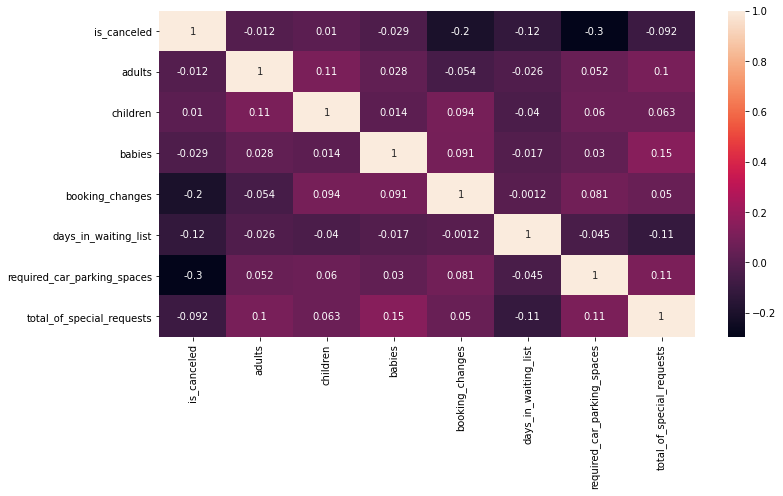

In [18]:
plt.figure(figsize= (12, 6))
sns.heatmap(df.corr(method= 'spearman'), annot= True)

# Data Cleaning

In [19]:
df.head()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5000 non-null   object 
 1   is_canceled                  5000 non-null   int64  
 2   adults                       5000 non-null   int64  
 3   children                     5000 non-null   float64
 4   babies                       5000 non-null   int64  
 5   meal                         5000 non-null   object 
 6   country                      4998 non-null   object 
 7   market_segment               5000 non-null   object 
 8   distribution_channel         5000 non-null   object 
 9   reserved_room_type           5000 non-null   object 
 10  booking_changes              5000 non-null   int64  
 11  deposit_type                 5000 non-null   object 
 12  days_in_waiting_list         5000 non-null   int64  
 13  customer_type     

In [21]:
df.isna().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        2
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

# - Karena country PRT lebih sering muncul maka akan di fill na dengan mode

In [22]:
df['country'].value_counts()

PRT    3174
ESP     550
GBR     505
IRL     172
FRA     113
DEU      89
NLD      55
CN       33
BEL      29
USA      28
POL      28
CHE      26
ITA      23
RUS      23
BRA      18
AUT      12
ROU      12
LUX      10
FIN       9
SWE       8
ARG       6
LVA       6
DNK       6
NOR       5
CHN       5
AUS       4
KOR       3
IND       3
LTU       3
CZE       3
CRI       2
OMN       2
DZA       2
MOZ       2
TUR       2
MEX       2
CHL       2
MAR       2
ZAF       2
EST       2
SVN       2
ZMB       1
CPV       1
BLR       1
PRI       1
SRB       1
ALB       1
CYM       1
SMR       1
GRC       1
ISR       1
HUN       1
ZWE       1
AGO       1
UKR       1
BWA       1
Name: country, dtype: int64

# - Mengubah data type (country) dari object -> str karena tidak bisa di fillna

In [23]:
df['country'] = df['country'].astype(str)

In [24]:
df['country'].fillna(df['country'].mode(), inplace= True)

In [25]:
df.isna().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

In [26]:
df.head()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1


In [27]:
print(df['hotel'].value_counts())
print('')
print(df['meal'].value_counts())
print('')
print(df['country'].value_counts())
print('')
print(df['market_segment'].value_counts())
print('')
print(df['distribution_channel'].value_counts())
print('')
print(df['reserved_room_type'].value_counts())
print('')
print(df['deposit_type'].value_counts())
print('')
print(df['customer_type'].value_counts())
print('')

Resort Hotel    5000
Name: hotel, dtype: int64

BB           3418
HB           1037
FB            319
Undefined     212
SC             14
Name: meal, dtype: int64

PRT    3174
ESP     550
GBR     505
IRL     172
FRA     113
DEU      89
NLD      55
CN       33
BEL      29
POL      28
USA      28
CHE      26
ITA      23
RUS      23
BRA      18
AUT      12
ROU      12
LUX      10
FIN       9
SWE       8
LVA       6
DNK       6
ARG       6
NOR       5
CHN       5
AUS       4
CZE       3
LTU       3
IND       3
KOR       3
MAR       2
MEX       2
ZAF       2
CRI       2
CHL       2
MOZ       2
EST       2
nan       2
DZA       2
OMN       2
SVN       2
TUR       2
GRC       1
SMR       1
AGO       1
CPV       1
PRI       1
ISR       1
CYM       1
ZMB       1
SRB       1
ALB       1
HUN       1
ZWE       1
UKR       1
BLR       1
BWA       1
Name: country, dtype: int64

Online TA        2156
Groups           1025
Offline TA/TO     929
Direct            618
Corporate         261
Complementary

# Data Preprocessing, Model Benchmark & Evaluation Metric

In [165]:
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import category_encoders as ce 

In [166]:
X = df.drop(['hotel', 'is_canceled'], axis= 1)
y = df['is_canceled']

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size= 0.2, random_state= 2021)
X_train

,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
3379,2,0.0,0,FB,PRT,Groups,TA/TO,A,0,Non Refund,0,Transient,0,0
874,3,0.0,0,HB,PRT,Offline TA/TO,TA/TO,E,0,No Deposit,0,Transient,1,1
3244,2,0.0,0,BB,POL,Online TA,TA/TO,D,0,No Deposit,0,Transient,0,2
1966,2,0.0,0,BB,IRL,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,0
1152,2,0.0,0,BB,PRT,Corporate,Corporate,E,0,No Deposit,0,Transient,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,2,0.0,1,HB,PRT,Online TA,TA/TO,A,1,No Deposit,0,Transient,0,3
3326,2,0.0,0,FB,PRT,Groups,TA/TO,A,0,No Deposit,0,Transient-Party,0,0
2701,1,0.0,0,BB,PRT,Groups,Corporate,A,0,Non Refund,0,Contract,0,0
3483,2,0.0,0,FB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0


In [168]:
transformer = ColumnTransformer([
    ('One_hot', OneHotEncoder(drop= 'first'), ['distribution_channel', 'deposit_type']),
    ('Ordinal', ce.OrdinalEncoder(), ['meal', 'country', 'market_segment', 'reserved_room_type', 'customer_type'])
], remainder= 'passthrough')

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.pipeline import Pipeline

In [170]:
X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.fit_transform(X_test)

In [171]:
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)
X_train_preprocessed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,0.0,3.0,2.0,3.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,1.0,0.0,0.0,3.0,3.0,3.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,1.0,0.0,0.0,2.0,1.0,3.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,3.0
3996,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3997,0.0,0.0,1.0,0.0,3.0,1.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3998,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
transformer.transformers_

[('One_hot',
  OneHotEncoder(drop='first'),
  ['distribution_channel', 'deposit_type']),
 ('Ordinal',
  OrdinalEncoder(cols=['meal', 'country', 'market_segment', 'reserved_room_type',
                       'customer_type'],
                 mapping=[{'col': 'meal', 'data_type': dtype('O'),
                           'mapping': BB           1
  HB           2
  Undefined    3
  FB           4
  SC           5
  NaN         -2
  dtype: int64},
                          {'col': 'country', 'data_type': dtype('O'),
                           'mapping': PRT     1
  GBR     2
  IRL     3
  FRA     4
  NLD     5
  ESP     6
  DEU     7
  LUX     8
  CHE     9
  CN     10
  RUS    11
  USA    12
  POL    13
  BRA    14
  ITA    15
  BEL    16
  SWE    17
  SVN    18
  CHN    19
  ARG    20
  EST    21
  BLR    22
  AUS    23
  ZAF    24
  R...
  dtype: int64},
                          {'col': 'market_segment', 'data_type': dtype('O'),
                           'mapping': Direct           1
 

In [173]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_Direct', 'x0_TA/TO', 'x1_Non Refund', 'x1_Refundable'],
      dtype=object)

In [174]:
X_train.columns

Index(['adults', 'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [177]:
features = list(transformer.transformers_[0][1].get_feature_names()) + ['adults', 'children', 'babies', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'meal', 'country', 'market_segment', 'reserved_room_type', 'customer_type']
features

['x0_Direct',
 'x0_TA/TO',
 'x1_Non Refund',
 'x1_Refundable',
 'adults',
 'children',
 'babies',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'meal',
 'country',
 'market_segment',
 'reserved_room_type',
 'customer_type']

In [178]:
X_train_preprocessed.columns= features
X_test_preprocessed.columns= features
X_train_preprocessed

,x0_Direct,x0_TA/TO,x1_Non Refund,x1_Refundable,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,meal,country,market_segment,reserved_room_type,customer_type
0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,0.0,3.0,2.0,3.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,1.0,0.0,0.0,3.0,3.0,3.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,1.0,0.0,0.0,2.0,1.0,3.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,3.0
3996,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3997,0.0,0.0,1.0,0.0,3.0,1.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3998,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [179]:
logreg = LogisticRegression()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
knn = KNeighborsClassifier()

models = {
    'Logistic Regression' : logreg,
    'Decission Tree' : tree,
    'Random Forest' : forest,
    'KNN' : knn 
}
score= []
for i in models:
    models[i].fit(X_train_preprocessed, y_train)
    y_pred = models[i].predict(X_test_preprocessed)
    print(models[i])
    print(classification_report(y_test, y_pred))
    score.append([precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)])

LogisticRegression()
              precision    recall  f1-score   support

           0       0.93      0.64      0.76       540
           1       0.69      0.95      0.80       460

    accuracy                           0.78      1000
   macro avg       0.81      0.79      0.78      1000
weighted avg       0.82      0.78      0.78      1000

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       540
           1       0.78      0.73      0.75       460

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.78      0.78      0.78      1000

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       540
           1       0.86      0.72      0.78       460

    accuracy                           0.82      1000
   macro avg       0.82      0.81      0.81      1000
wei

In [180]:
pd.DataFrame(score, columns= ['Precission', 'Recall', 'f1 score'], index= models.keys()).sort_values(by= 'f1 score', ascending= False)

,Precission,Recall,f1 score
Logistic Regression,0.692675,0.945652,0.799632
Random Forest,0.857881,0.721739,0.783943
Decission Tree,0.777262,0.728261,0.751964
KNN,0.641434,0.700000,0.669439


# 2 Model Terbaik

In [181]:
logreg.fit(X_train_preprocessed, y_train)
y_pred_tree = tree.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       540
           1       0.78      0.73      0.75       460

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.78      0.78      0.78      1000



In [182]:
tree_score = []
tree_score.append([
    precision_score(y_test, y_pred_tree), 
    recall_score(y_test, y_pred_tree), 
    f1_score(y_test, y_pred_tree)
])
pd.DataFrame(tree_score, columns= ['Precision', 'Recall', 'f1 score'], index= ['Decision Tree Classifier Before Tuning'])

,Precision,Recall,f1 score
Decision Tree Classifier Before Tuning,0.777262,0.728261,0.751964


In [183]:
forest.fit(X_train_preprocessed, y_train)
y_pred_forest = forest.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       540
           1       0.85      0.70      0.77       460

    accuracy                           0.81      1000
   macro avg       0.82      0.80      0.80      1000
weighted avg       0.81      0.81      0.80      1000



In [184]:
forest_score = []
forest_score.append([
    precision_score(y_test, y_pred_forest), 
    recall_score(y_test, y_pred_forest), 
    f1_score(y_test, y_pred_forest)
])
pd.DataFrame(forest_score, columns= ['Precision', 'Recall', 'f1 score'], index= ['Random Forest Classifier Before Tuning'])

,Precision,Recall,f1 score
Random Forest Classifier Before Tuning,0.852243,0.702174,0.769964


# Hyperparameter Tuning 2 Model Terbaik

# - Decision Tree Classifier

In [185]:
estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessed', 'model', 'preprocessed__n_jobs', 'preprocessed__remainder', 'preprocessed__sparse_threshold', 'preprocessed__transformer_weights', 'preprocessed__transformers', 'preprocessed__verbose', 'preprocessed__One_hot', 'preprocessed__Ordinal', 'preprocessed__One_hot__categories', 'preprocessed__One_hot__drop', 'preprocessed__One_hot__dtype', 'preprocessed__One_hot__handle_unknown', 'preprocessed__One_hot__sparse', 'preprocessed__Ordinal__categories', 'preprocessed__Ordinal__dtype', 'preprocessed__Ordinal__handle_unknown', 'preprocessed__Ordinal__unknown_value', 'model__ccp_alpha', 'model__class_weight', 'model__criterion', 'model__max_depth', 'model__max_features', 'model__max_leaf_nodes', 'model__min_impurity_decrease', 'model__min_impurity_split', 'model__min_samples_leaf', 'model__min_samples_split', 'model__min_weight_fraction_leaf', 'model__random_state', 'model__splitter'])

# - Hyperparam Estimator :

- Criterion :
Berfungsi untuk mengukur kualitas split. Kriteria yang didukung adalah “gini” untuk ketidakmurnian Gini dan “entropi” untuk perolehan informasi.

- Max_depth :
Kedalaman maksimum pohon. Jika Tidak Ada, node akan diperluas sampai semua daun murni atau sampai semua daun berisi sampel min_samples_split kurang dari.

- Min_samples_leaf :
Jumlah sampel minimum yang dibutuhkan untuk berada di simpul daun. Titik pisah pada kedalaman berapa pun hanya akan dipertimbangkan jika meninggalkan setidaknya sampel pelatihan min_samples_leaf di setiap cabang kiri dan kanan. Ini mungkin memiliki efek menghaluskan model, terutama dalam regresi

- Max_features : 
Jumlah fitur yang perlu dipertimbangkan saat mencari split terbaik

- Random_split : 
Mengontrol keacakan estimator. Fitur selalu diubah secara acak di setiap pemisahan, meskipun pembagi disetel ke "terbaik"

In [186]:
model =  DecisionTreeClassifier()
estimator = Pipeline([('preprocessed', transformer), ('model', model)])

hyperparam_space = {
    'model__criterion' : ['gini', 'entropy'], 
    'model__max_depth' : [2, 3, 5], 
    'model__max_features' : [2, 3, 5, 7, 9], 
    'model__min_samples_leaf' : [0.05, 0.01, 0.1],
    'model__random_state' : [2021]
}

skf = StratifiedKFold(n_splits = 5)

grid_search = GridSearchCV(
    estimator, 
    param_grid = hyperparam_space, 
    cv = skf, 
    scoring = 'f1', 
    n_jobs = -1 
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessed',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One_hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['distribution_channel',
                                                                          'deposit_type']),
                                                                        ('Ordinal',
                                                                         OrdinalEncoder(),
                                                                         ['meal',
                                                                          'country',
                                                                

In [187]:
grid_search.best_params_

{'model__criterion': 'entropy',
 'model__max_depth': 5,
 'model__max_features': 9,
 'model__min_samples_leaf': 0.01,
 'model__random_state': 2021}

In [188]:
grid_search.best_score_

0.8425354508635328

In [190]:
grid_search.best_estimator_.fit(X_train, y_train)
y_pred_tree_tuned = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_tree_tuned))

              precision    recall  f1-score   support

           0       0.96      0.71      0.82       540
           1       0.74      0.97      0.84       460

    accuracy                           0.83      1000
   macro avg       0.85      0.84      0.83      1000
weighted avg       0.86      0.83      0.83      1000



# - Random Forest Classifier

In [191]:
model =  RandomForestClassifier()
estimator = Pipeline([('preprocessed', transformer), ('model', model)])

hyperparam_space = {
    'model__criterion' : ['gini', 'entropy'], 
    'model__max_depth' : [2, 3, 5], 
    'model__max_features' : [2, 3, 5, 7, 9], 
    'model__min_samples_leaf' : [0.05, 0.01, 0.1],
    'model__n_estimators' : [200],
    'model__random_state' : [2021]
}

skf = StratifiedKFold(n_splits = 5)

grid_search = GridSearchCV(
    estimator, 
    param_grid = hyperparam_space, 
    cv = skf, 
    scoring = 'f1', 
    n_jobs = -1 
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessed',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One_hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['distribution_channel',
                                                                          'deposit_type']),
                                                                        ('Ordinal',
                                                                         OrdinalEncoder(),
                                                                         ['meal',
                                                                          'country',
                                                                

In [192]:
grid_search.best_params_

{'model__criterion': 'entropy',
 'model__max_depth': 5,
 'model__max_features': 3,
 'model__min_samples_leaf': 0.01,
 'model__n_estimators': 200,
 'model__random_state': 2021}

In [193]:
grid_search.best_score_

0.8554192504992532

In [194]:
grid_search.best_estimator_.fit(X_train, y_train)
y_pred_forest_tuned = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_forest_tuned))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       540
           1       0.79      0.95      0.86       460

    accuracy                           0.86      1000
   macro avg       0.87      0.87      0.86      1000
weighted avg       0.88      0.86      0.86      1000



# - Summary

In [196]:
pd.DataFrame(tree_score, columns= ['Precision', 'Recall', 'f1 score'], index= ['Decision Tree Classifier Before Tuning'])

,Precision,Recall,f1 score
Decision Tree Classifier Before Tuning,0.777262,0.728261,0.751964


In [198]:
tree_score_tuned= []
tree_score_tuned.append([
    precision_score(y_test, y_pred_tree_tuned), 
    recall_score(y_test, y_pred_tree_tuned), 
    f1_score(y_test, y_pred_tree_tuned)
])
pd.DataFrame(tree_score_tuned, columns= ['Precision', 'Recall', 'f1 score'], index= ['Decision Tree Classifier After Tuning'])

,Precision,Recall,f1 score
Decision Tree Classifier After Tuning,0.738411,0.969565,0.838346


In [199]:
pd.DataFrame(forest_score, columns= ['Precision', 'Recall', 'f1 score'], index= ['Random Forest Classifier Before Tuning'])

,Precision,Recall,f1 score
Random Forest Classifier Before Tuning,0.852243,0.702174,0.769964


In [200]:
forest_score_tuned= []
forest_score_tuned.append([
    precision_score(y_test, y_pred_forest_tuned), 
    recall_score(y_test, y_pred_forest_tuned), 
    f1_score(y_test, y_pred_forest_tuned)
])
pd.DataFrame(forest_score_tuned, columns= ['Precision', 'Recall', 'f1 score'], index= ['Random Forest Classifier After Tuning'])

,Precision,Recall,f1 score
Random Forest Classifier After Tuning,0.788809,0.95,0.861933


# Best Model Performance : 
- Random Forest Classifier After Tuning

Model yang akan dipilih untuk dipakai dalam memprediksi apakah user akan cancel booking / tidak

In [201]:
pd.DataFrame(forest_score_tuned, columns= ['Precision', 'Recall', 'f1 score'], index= ['Random Forest Classifier After Tuning'])

,Precision,Recall,f1 score
Random Forest Classifier After Tuning,0.788809,0.95,0.861933
